             Configuration       Inertia  Silhouette Score
0     Euclidean + KMeans++    139.820496          0.459948
1  Euclidean + Random Init    139.825435          0.459378
2     Manhattan + KMeans++  20234.817892          0.534024


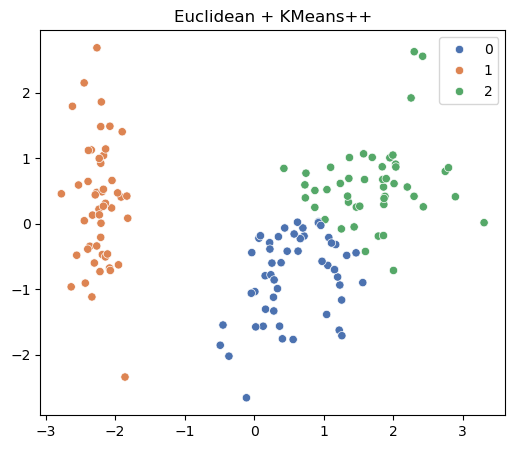

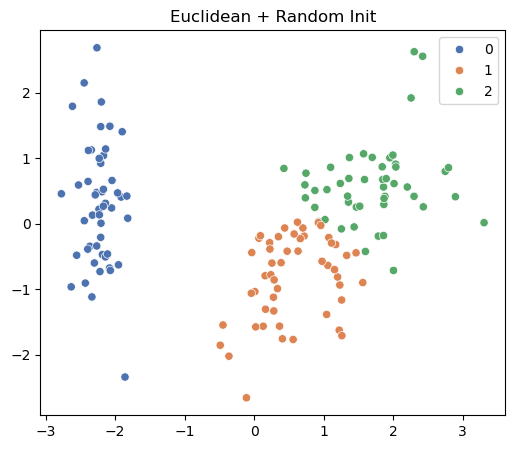

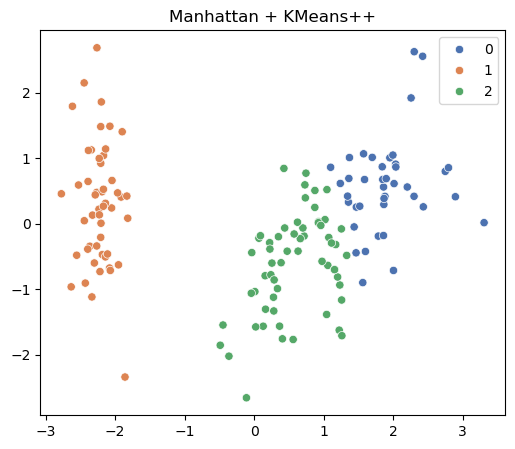

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from scipy.spatial.distance import cityblock

import warnings
warnings.filterwarnings('ignore')

iris = load_iris()
X = iris.data
y = iris.target  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

def kmeans_clustering(X, n_clusters=3, init_strategy='k-means++', distance_metric='euclidean'):
    if distance_metric == 'manhattan':
       
        X_transformed = np.array([[cityblock(x, y) for y in X] for x in X])
    else:
        X_transformed = X  
    
    kmeans = KMeans(n_clusters=n_clusters, init=init_strategy, random_state=42, n_init=10)
    kmeans.fit(X_transformed)
    
    labels = kmeans.labels_
    inertia = kmeans.inertia_
    silhouette = silhouette_score(X_transformed, labels)
    
    return labels, inertia, silhouette

configs = [
    ("Euclidean + KMeans++", "k-means++", "euclidean"),
    ("Euclidean + Random Init", "random", "euclidean"),
    ("Manhattan + KMeans++", "k-means++", "manhattan"),
]

results = []
for name, init, metric in configs:
    labels, inertia, silhouette = kmeans_clustering(X_scaled, n_clusters=3, init_strategy=init, distance_metric=metric)
    results.append((name, inertia, silhouette))

df_results = pd.DataFrame(results, columns=["Configuration", "Inertia", "Silhouette Score"])
print(df_results)

def plot_clusters(X, labels, title):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette="deep", legend="full")
    plt.title(title)
    plt.show()

for name, init, metric in configs:
    labels, _, _ = kmeans_clustering(X_scaled, n_clusters=3, init_strategy=init, distance_metric=metric)
    plot_clusters(X_scaled, labels, name)
